In [100]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [101]:
df=pd.read_csv("BOSTON.csv")

In [102]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2



1) CRIM per capita crime rate by town

2) ZN proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS proportion of non-retail business acres per town

4) CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5) NOX nitric oxides concentration (parts per 10 million)

6) RM average number of rooms per dwelling

7) AGE proportion of owner-occupied units built prior to 1940

8) DIS weighted distances to five Boston employment centres

9) RAD index of accessibility to radial highways

10) TAX full-value property-tax rate per 10,000 usd

11) PTRATIO pupil-teacher ratio by town

12) B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT % lower status of the population

Each record in the database describes a Boston suburb or town.

In [103]:
df.shape

(506, 14)

In [104]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [105]:
df.dropna(inplace=True)
df.shape

(394, 14)

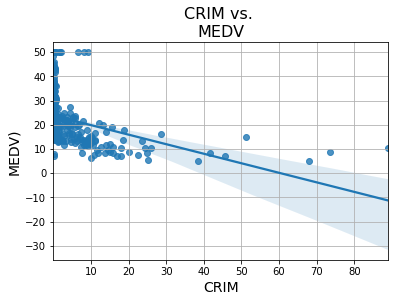

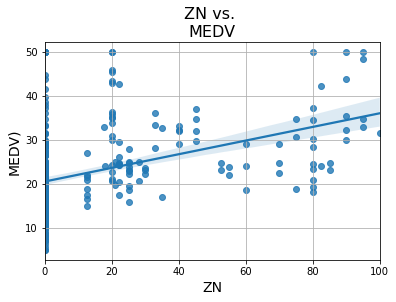

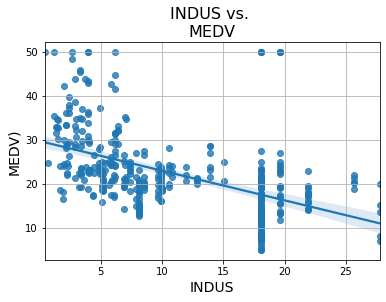

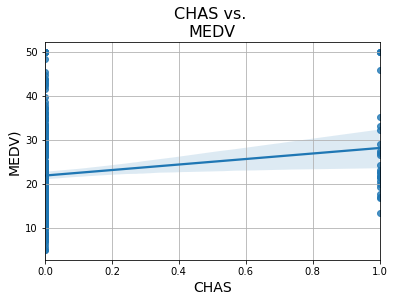

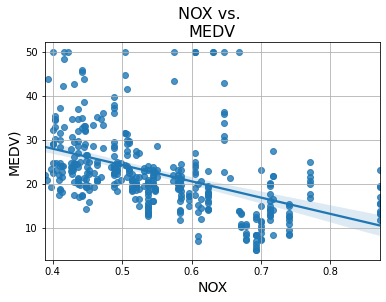

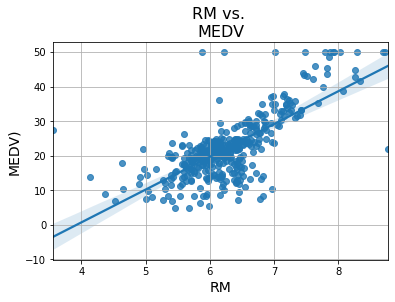

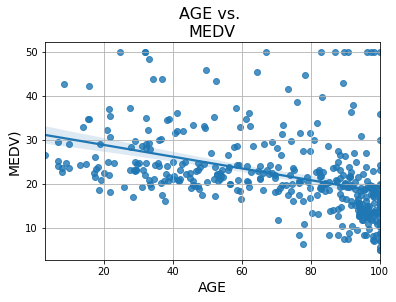

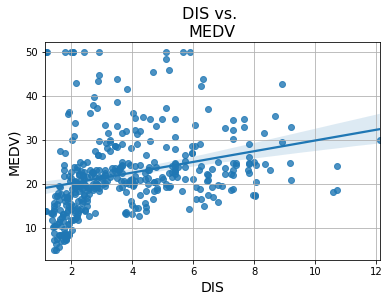

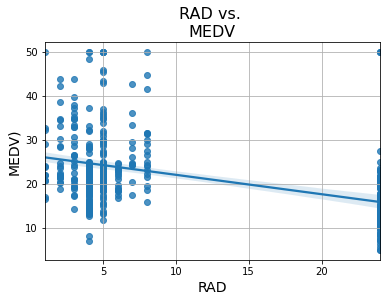

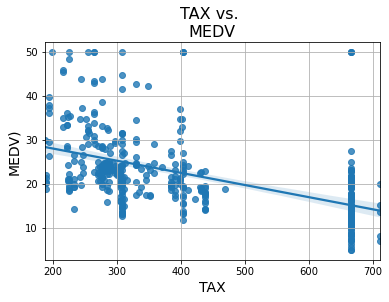

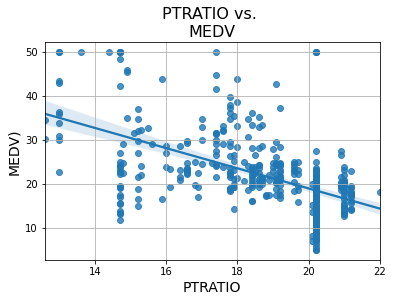

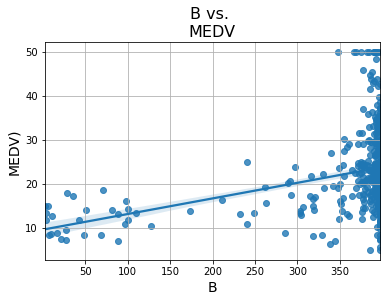

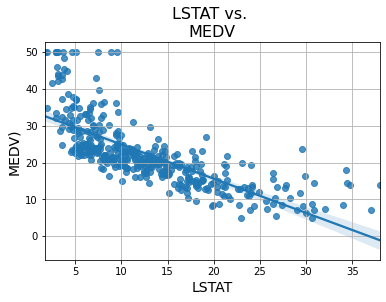

In [106]:
##Plotting graph between CRIM and MEDV for visualizing the effect of crim rate on house price 

## Automating the code sunf For loop .

for i in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    plt.title("{} vs. \nMEDV".format(i),fontsize=16)
    sns.regplot(x=df[i],y=df['MEDV'])
    plt.grid(True)
    plt.xlabel(i,fontsize=14)
    plt.ylabel('MEDV)',fontsize=14)
    
    
    plt.show()

### Insights from visualizations

1 ) As Crime rate increases the rate of House decreases

2) As Nitric Oxide concentration increases the rate of House decreases 

3) As the percentage of lower status population is low, price of houses are high

4) As room increases the price of house increases 

5) As the distance between boston employment centre (DIS) increases the house price increases

6) As the non-retail business in town increases(INDUS) the house price decreases

7) As the age of house(AGE) increases the house price decreases.

8) As property tax (TAX) increase the price of house decrease

9) As pupil to teacher ratio increases (PTRATIO) the house price decreases

10) As the proportion of African- American descent increases (B) the house prices also increases



### Visualizing Data

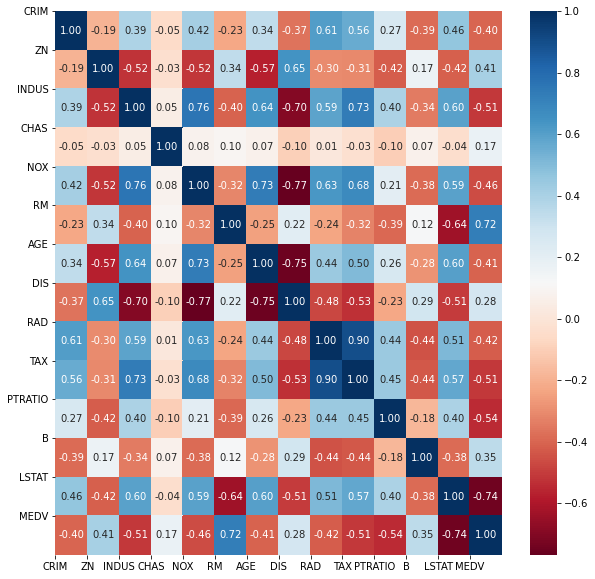

In [107]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [108]:
# Finding out the correlation between the features
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


### Insights 
1) By looking at the correlation we can see that RM has a strong positive correlation with MEDV (0.72) where as LSTAT has a high negative correlation with MEDV(-0.74). 


### Data Preprocessing 

### Transformations ....Log & Square root 

In [109]:
df["CRIM"].skew() ## Let us check the skew of the CRIM variable .

#df.head()

5.256933799622241

<AxesSubplot:>

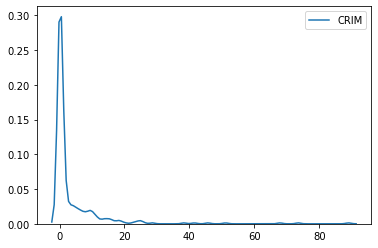

In [110]:
sns.kdeplot(df["CRIM"]) ## Plotting the shape 

In [111]:
## LOG TRANSFORM 

CRIM_log=np.log(df["CRIM"])## Transforming  each  values for CRIM variable to log ()
CRIM_log.skew() ## check the skew 

0.39823571556144166

<AxesSubplot:>

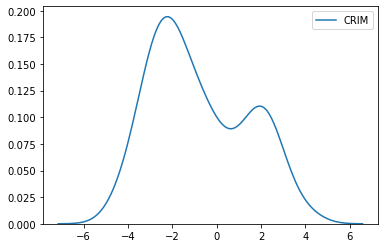

In [112]:
sns.kdeplot(CRIM_log) # plot the shape 

In [113]:
## Square root transformation 
CRIM_sqrt=np.sqrt(df["CRIM"])
CRIM_sqrt.skew()

2.1716679882349688

<AxesSubplot:>

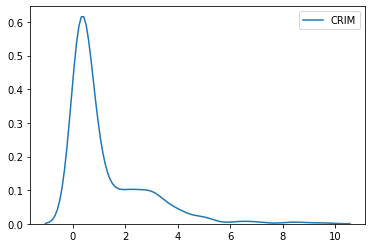

In [114]:
sns.kdeplot(CRIM_sqrt) # plot the shape 

#### As the log transformation of crim gives better normalization of data , therfore we will use CRIM_log for modelling

In [115]:
df["LSTAT"].skew() ## Let us check the skew of the CRIM variable 

0.9426647803194949

<AxesSubplot:>

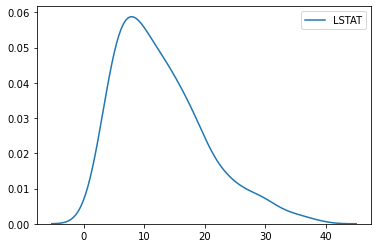

In [116]:
sns.kdeplot(df["LSTAT"]) ## Plotting the shape 

In [117]:

## LOG TRANSFORM 

LSTAT_log=np.log(df["LSTAT"])## Transforming  each  values for CRIM variable to log ()
LSTAT_log.skew() ## check the skew 

-0.31906947768200433

<AxesSubplot:>

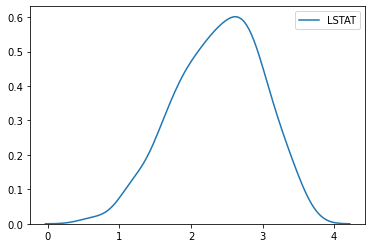

In [118]:

sns.kdeplot(LSTAT_log) # plot the shape 

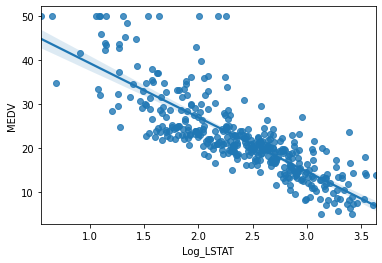

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [119]:
import seaborn as sns 

sns.regplot(x=np.log(df["LSTAT"]),y=df["MEDV"])
plt.xlabel("Log_LSTAT")
plt.ylabel("MEDV")
plt.show()
df.head()


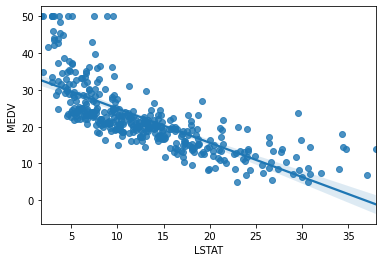

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [120]:
sns.regplot(x=df["LSTAT"],y=df["MEDV"])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()
df.head()

#### Hence the log tranformation of LSTAT gives better visualization and data normalization, therefore we will use LSTAT_log for modelling

In [121]:
df["NOX"].skew() ## Let us check the skew of the NOX variable .

0.7033773563943658

<AxesSubplot:>

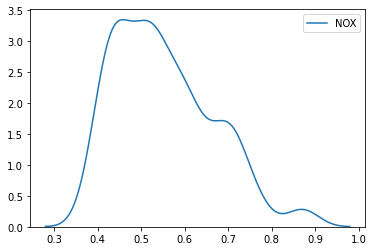

In [122]:
sns.kdeplot(df["NOX"]) ## Plotting the shape 

In [123]:
## LOG TRANSFORM 
NOX_log=np.log(df["NOX"])## Transforming  each  values for NOX variable to log ()
NOX_log.skew() ## check the skew 

0.33392908853290615

<AxesSubplot:>

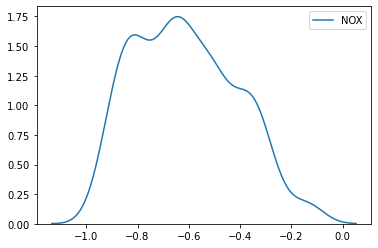

In [124]:
sns.kdeplot(NOX_log) # plot the shape 

#### We will use the log transformed NOX variable for modelling

In [125]:
df["DIS"].skew() ## Let us check the skew of the DIS variable .

1.0326249012839293

<AxesSubplot:>

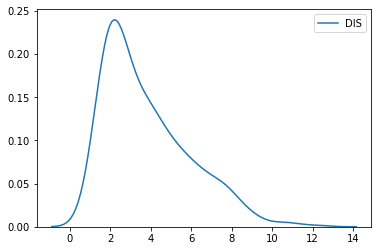

In [126]:

sns.kdeplot(df["DIS"]) ## Plotting the shape 

In [127]:
## LOG TRANSFORM 

DIS_log=np.log(df["DIS"])## Transforming  each  values for CRIM variable to log ()
DIS_log.skew() ## check the skew 

0.15944213877506708

<AxesSubplot:>

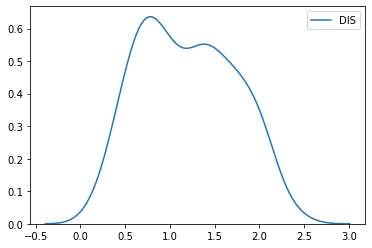

In [128]:
sns.kdeplot(DIS_log)

#### Hence we will be using the log transformed NOX varaible for modelling

In [129]:
df["AGE"].skew() ## Let us check the skew of the DIS variable .

-0.5948795143516377

<AxesSubplot:>

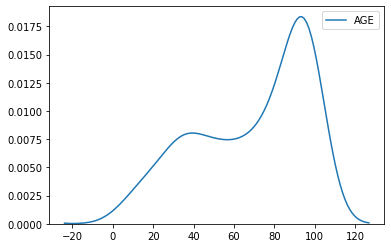

In [130]:
import seaborn as sns
sns.kdeplot(df["AGE"])

In [131]:
## LOG TRANSFORM 

AGE_log=np.log(df["AGE"])## Transforming  each  values for CRIM variable to log ()
AGE_log.skew() ## check the skew 

-1.7082807119084749

<AxesSubplot:>

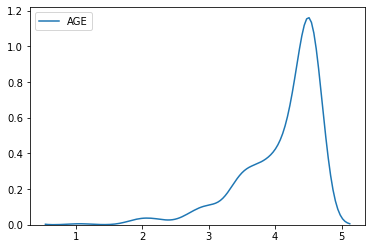

In [132]:

sns.kdeplot(AGE_log)

In [133]:
df['CRIM_LOG '] = np.log(df['CRIM']) 
df['NOX_LOG '] = np.log(df['NOX']) 
df['LSTAT_log'] =np.log(df["LSTAT"])      
df['DIS_log'] =np.log(df["DIS"])     
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_LOG,NOX_LOG,LSTAT_log,DIS_log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-5.064036,-0.619897,1.605430,1.408545
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-3.600502,-0.757153,2.212660,1.602836
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-3.601235,-0.757153,1.393766,1.602836
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-3.430523,-0.780886,1.078410,1.802073
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,-3.511570,-0.780886,1.650580,1.802073


### Prediction Model's

### Linear, Lasso, Ridge and Elasticnet Regression 

In [140]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [141]:
X= df.drop(['MEDV','CRIM','LSTAT'], axis = 1)
y= df['MEDV']

X1 = X.values.reshape(-1,1)
y1 = y.values.reshape(-1,1)

In [142]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [143]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (275, 15)
Shape of X_test:  (119, 15)
Shape of y_train:  (275,)
Shape of y_test (119,)


In [149]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

LinearRegression()
Linear.fit(X_train, y_train)

Lasso =Lasso()
Lasso.fit(X_train, y_train)

Ridge=Ridge()
Ridge.fit(X_train, y_train)

elastic=ElasticNet()
elastic.fit(X_train, y_train)

# eye ball the models 
print(Linear)
print("")
print(elastic)
print("")
print(Ridge)
print("")
print(Lasso)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


### Linear Model  prediction and accuracy 

In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predicting R2 Score the Train set results
y_pred_Linear_train = Linear.predict(X_train)
r2_score_Linear_train = r2_score(y_train, y_pred_Linear_train)
mae_Linear_tr = mean_absolute_error(y_train, y_pred_Linear_train)

# Predicting RMSE the Train set results
rmse_Linear_tr = (np.sqrt(mean_squared_error(y_train, y_pred_Linear_train)))

# Predicting R2 Score the Test set results
y_pred_Linear_test = Linear.predict(X_test)
r2_score_Linear_test = r2_score(y_test, y_pred_Linear_test)
mae_Linear_ts = mean_absolute_error(y_test, y_pred_Linear_test)

# Predicting RMSE the Test set results
rmse_Linear_ts = (np.sqrt(mean_squared_error(y_test, y_pred_Linear_test)))

print('R2_score Linear (train): ', r2_score_Linear_train)
print('R2_score Linear (test): ', r2_score_Linear_test)
print("RMSE Linear (train): ", rmse_Linear_tr)
print("RMSE Linear (test): ", rmse_Linear_ts)
print("MAE Linear (train):",mae_Linear_tr)
print("MAE Linear (test):",mae_Linear_ts)

R2_score Linear (train):  0.7832905517963369
R2_score Linear (test):  0.8268489866116819
RMSE Linear (train):  4.040558759577153
RMSE Linear (test):  4.189219248347133
MAE Linear (train): 2.8143426344322933
MAE Linear (test): 3.167405904033502


### Ridge Model prediction and accuracy 

In [93]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predicting R2 Score the Train set results
y_pred_Ridge_train = Ridge.predict(X_train)
r2_score_Ridge_train = r2_score(y_train, y_pred_Ridge_train)
mae_Ridge_tr = mean_absolute_error(y_train, y_pred_Ridge_train)

# Predicting RMSE the Train set results
rmse_Ridge_tr = (np.sqrt(mean_squared_error(y_train, y_pred_Ridge_train)))

# Predicting R2 Score the Test set results
y_pred_Ridge_test = Ridge.predict(X_test)
r2_score_Ridge_test = r2_score(y_test, y_pred_Ridge_test)
mae_Ridge_ts = mean_absolute_error(y_test, y_pred_Ridge_test)

# Predicting RMSE the Test set results
rmse_Ridge_ts = (np.sqrt(mean_squared_error(y_test, y_pred_Ridge_test)))

print('R2_score Ridge (train): ', r2_score_Ridge_train)
print('R2_score Ridge (test): ', r2_score_Ridge_test)
print("RMSE Ridge (train): ", rmse_Ridge_tr)
print("RMSE Ridge (test): ", rmse_Ridge_ts)
print("MAE Ridge (train):",mae_Ridge_tr)
print("MAE Ridge (test):",mae_Ridge_ts)

R2_score Ridge (train):  0.7802907582318517
R2_score Ridge (test):  0.8247096908604311
RMSE Ridge (train):  4.068428297568632
RMSE Ridge (test):  4.2150188869182825
MAE Ridge (train): 2.783613842765536
MAE Ridge (test): 3.1360965349202288


### Lasso Model prediction and accuracy

In [94]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predicting R2 Score the Train set results
y_pred_Lasso_train = Lasso.predict(X_train)
r2_score_Lasso_train = r2_score(y_train, y_pred_Lasso_train)
mae_Lasso_tr = mean_absolute_error(y_train, y_pred_Lasso_train)

# Predicting RMSE the Train set results
rmse_Lasso_tr = (np.sqrt(mean_squared_error(y_train, y_pred_Lasso_train)))

# Predicting R2 Score the Test set results
y_pred_Lasso_test = Lasso.predict(X_test)
r2_score_Lasso_test = r2_score(y_test, y_pred_Lasso_test)
mae_Lasso_ts = mean_absolute_error(y_test, y_pred_Lasso_test)

# Predicting RMSE the Test set results
rmse_Lasso_ts = (np.sqrt(mean_squared_error(y_test, y_pred_Lasso_test)))

print('R2_score Lasso (train): ', r2_score_Lasso_train)
print('R2_score Lasso (test): ', r2_score_Lasso_test)
print("RMSE Lasso (train): ", rmse_Lasso_tr)
print("RMSE Lasso (test): ", rmse_Lasso_ts)
print("MAE Lasso (train):",mae_Lasso_tr)
print("MAE Lasso (test):",mae_Lasso_ts)

R2_score Lasso (train):  0.6797174170170338
R2_score Lasso (test):  0.6970211273093323
RMSE Lasso (train):  4.912122228635557
RMSE Lasso (test):  5.541492428507817
MAE Lasso (train): 3.289402613150757
MAE Lasso (test): 3.8301352696065827


### Elastic Net Model prediction and accuracy 

In [95]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predicting R2 Score the Train set results
y_pred_elastic_train = elastic.predict(X_train)
r2_score_elastic_train = r2_score(y_train, y_pred_elastic_train)
mae_elastic_tr = mean_absolute_error(y_train, y_pred_elastic_train)

# Predicting RMSE the Train set results
rmse_elastic_tr = (np.sqrt(mean_squared_error(y_train, y_pred_elastic_train)))

# Predicting R2 Score the Test set results
y_pred_elastic_test = elastic.predict(X_test)
r2_score_elastic_test = r2_score(y_test, y_pred_elastic_test)
mae_elastic_ts = mean_absolute_error(y_test, y_pred_elastic_test)

# Predicting RMSE the Test set results
rmse_elastic_ts = (np.sqrt(mean_squared_error(y_test, y_pred_elastic_test)))

print('R2_score elastic (train): ', r2_score_elastic_train)
print('R2_score elastic (test): ', r2_score_elastic_test)
print("RMSE elastic (train): ", rmse_elastic_tr)
print("RMSE elastic (test): ", rmse_elastic_ts)
print("MAE elastic (train):",mae_elastic_tr)
print("MAE elastic (test):",mae_elastic_ts)

R2_score elastic (train):  0.6353624835659256
R2_score elastic (test):  0.639707031556277
RMSE elastic (train):  5.241229522355264
RMSE elastic (test):  6.042942539793903
MAE elastic (train): 3.5356383668337137
MAE elastic (test): 4.201245201995623


### Polynomial Regression - 2nd degree 

In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
from sklearn.metrics import r2_score

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)
mae_poly_tr = mean_absolute_error(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)
mae_poly_ts = mean_absolute_error(y_test, y_pred_poly2_test)

# Predicting RMSE the Train set results
rmse_poly2_tr = (np.sqrt(mean_squared_error(y_train, y_pred_poly2_train)))

# Predicting RMSE the Test set results
rmse_poly2_ts = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('R2_score polynomial (train): ', r2_score_poly2_train)
print('R2_score polynomial (test): ', r2_score_poly2_test)
print("RMSE polynomial (train): ", rmse_poly2_tr)
print("RMSE polynomial (test): ", rmse_poly2_ts)
print("MAE polynomial (train):",mae_poly_tr)
print("MAE polynomial (test):",mae_poly_ts)

R2_score polynomial (train):  0.9679038530917294
R2_score polynomial (test):  0.7819441435553236
RMSE polynomial (train):  1.5549948437466428
RMSE polynomial (test):  4.701153687460182
MAE polynomial (train): 1.2095929184826937
MAE polynomial (test): 3.02527629066916


In [98]:
models = [('Linear Regression', r2_score_Linear_train, r2_score_Linear_test, rmse_Linear_tr, rmse_Linear_ts, mae_Linear_tr, mae_Linear_ts),
          ('Polynomial Regression (2nd)', r2_score_poly2_train, r2_score_poly2_test, rmse_poly2_tr, rmse_poly2_ts, mae_poly_tr, mae_poly_ts),
          ('Ridge Regression', r2_score_Ridge_train, r2_score_Ridge_test, rmse_Ridge_tr, rmse_Ridge_ts, mae_Ridge_tr, mae_Ridge_ts),
          ('Lasso Regression', r2_score_Lasso_train, r2_score_Lasso_test, rmse_Lasso_tr, rmse_Lasso_ts, mae_Lasso_tr, mae_Lasso_ts),
          ('Elastic Net Regression', r2_score_elastic_train, r2_score_elastic_test, rmse_elastic_tr, rmse_elastic_ts, mae_elastic_tr, mae_elastic_ts)
         ]
predict = pd.DataFrame(data = models, columns=['Model', 'R2_Score(training)', 'R2_Score(test)', 'RSME(train)', 'RSME(test)', 'MAE(Train)', 'MAE(Test)'])
predict

,Model,R2_Score(training),R2_Score(test),RSME(train),RSME(test),MAE(Train),MAE(Test)
0,Linear Regression,0.783291,0.826849,4.040559,4.189219,2.814343,3.167406
1,Polynomial Regression (2nd),0.967904,0.781944,1.554995,4.701154,1.209593,3.025276
2,Ridge Regression,0.780291,0.824710,4.068428,4.215019,2.783614,3.136097
3,Lasso Regression,0.679717,0.697021,4.912122,5.541492,3.289403,3.830135
4,Elastic Net Regression,0.635362,0.639707,5.241230,6.042943,3.535638,4.201245


### Visualizing Model Performance 

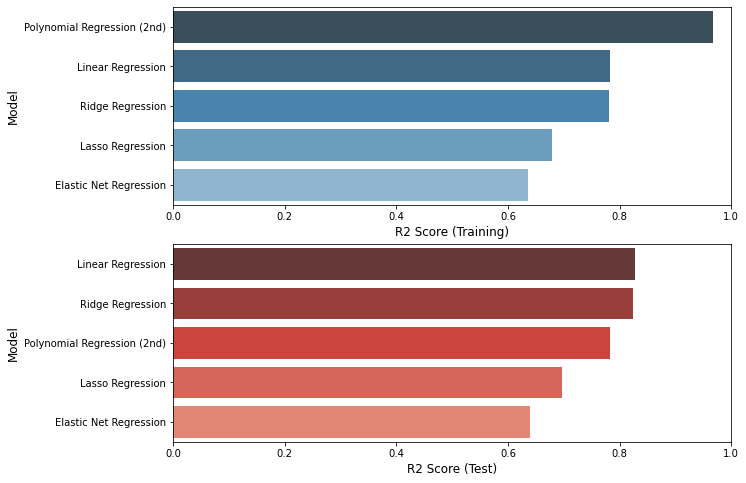

In [99]:
f, axes = plt.subplots(2,1, figsize=(10,8))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=12)
axes[0].set_ylabel('Model',size=12)
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=12)
axes[1].set_ylabel('Model',size=12)
axes[1].set_xlim(0,1.0)

plt.show()

In [47]:
# Building the model with Train/Test Split  and define hyperparameters 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))
print(df.shape)
print("")


print ("The Hyper parameters to be optimized are ",parameters)

(295, 15)
(99, 15)
(295,)
(99,)
(394, 18)

The Hyper parameters to be optimized are  {'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])}


In [48]:
# Fit all the models in Grid Search Cross Validation .
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

Linear=LinearRegression()
Lasso =Lasso()
Ridge=Ridge()
elastic=ElasticNet()


gridLasso = GridSearchCV(Lasso, parameters,scoring="r2")
gridRidge = GridSearchCV(Ridge, parameters, scoring ='r2')
gridelastic=GridSearchCV(elastic,parameters,scoring="r2")



gridLasso.fit(X_train, y_train)
gridRidge.fit(X_train, y_train)
gridelastic.fit(X_train,y_train)
Linear.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
##  Print the best parameters, R-squared scores, MSE, and coefficients

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ridge_bp=gridRidge.best_params_
lasso_bp=gridLasso.best_params_
elastic_bp=gridelastic.best_params_
print("ridge best parameters:", ridge_bp)
print("lasso best parameters:", gridLasso.best_params_)
print("elastic best parameters:",gridelastic.best_params_)
print("")

ridge_score=gridRidge.score(X_test, y_test)
lasso_score=gridLasso.score(X_test, y_test)
linear_score=Linear.score(X_test, y_test)
elastic_score=gridelastic.score(X_test,y_test)
print("ridge score:", gridRidge.score(X_test, y_test))
print("lasso score:", gridLasso.score(X_test, y_test))
print("linear score:", Linear.score(X_test, y_test))
print("elastic score:",gridelastic.score(X_test,y_test))
print("")

ridge_mse=mean_squared_error(y_test, gridRidge.predict(X_test))
lasso_mse=mean_squared_error(y_test, gridLasso.predict(X_test))
linear_mse=mean_squared_error(y_test, Linear.predict(X_test))
elastic_mse=mean_squared_error(y_test,gridelastic.predict(X_test))
print("ridge MSE:", mean_squared_error(y_test, gridRidge.predict(X_test)))
print("lasso MSE:", mean_squared_error(y_test, gridLasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, Linear.predict(X_test)))
print("elastic MSE:", mean_squared_error(y_test,gridelastic.predict(X_test)))
print("")

print("ridge best estimator coef:", np.round(gridRidge.best_estimator_.coef_,2))
print("lasso best estimator coef:", np.round(gridLasso.best_estimator_.coef_,2))
print("linear coef:", np.round(Linear.coef_,2))
print("elastic coeff:",np.round(gridelastic.best_estimator_.coef_,2))

ridge best parameters: {'alpha': 0.30000000000000004}
lasso best parameters: {'alpha': 0.1}
elastic best parameters: {'alpha': 0.1}

ridge score: 0.771762899669587
lasso score: 0.7566172658412871
linear score: 0.7749582932255792
elastic score: 0.7485703971660295

ridge MSE: 16.79059657246893
lasso MSE: 17.90480730804686
linear MSE: 16.55552276540049
elastic MSE: 18.49678698795994

ridge best estimator coef: [ 0.   -0.    2.85 -7.03  3.03 -0.    0.15  0.19 -0.01 -0.81  0.01 -0.08
 -6.73 -7.79 -6.09]
lasso best estimator coef: [ 0.02 -0.03  1.59 -0.    3.01 -0.01 -0.82  0.16 -0.01 -0.71  0.01 -0.12
 -0.   -7.64 -0.  ]
linear coef: [ 0.000e+00  0.000e+00  2.980e+00 -4.614e+01  3.010e+00 -1.000e-02
  4.900e-01  1.900e-01 -1.000e-02 -8.600e-01  1.000e-02 -9.000e-02
  1.634e+01 -7.760e+00 -7.290e+00]
elastic coeff: [ 0.02 -0.03  1.47 -0.    3.47 -0.02 -0.84  0.19 -0.01 -0.79  0.01 -0.25
 -0.32 -5.86 -0.25]


In [50]:
models = [('Ridge Regression',  ridge_score, rmse_Ridge_tr, rmse_Ridge_ts),
          ('Lasso Regression',  lasso_score,  rmse_Lasso_tr, rmse_Lasso_ts),
          ('Linear Regression', linear_score,  rmse_Linear_tr, rmse_Linear_ts),
          ('ElasticNet Regression', elastic_score,  rmse_elastic_tr, rmse_elastic_ts),
         ]
predict = pd.DataFrame(data = models, columns=['Model', 'Score', 'RSME(train)', 'RSME(test)'])
predict

,Model,Score,RSME(train),RSME(test)
0,Ridge Regression,0.771763,4.068428,4.215019
1,Lasso Regression,0.756617,4.912122,5.541492
2,Linear Regression,0.774958,4.040559,4.189219
3,ElasticNet Regression,0.748570,5.241230,6.042943


### Based on score and evaluations polynomial regression model is the best model for predicting house prices.